In [1]:
import numpy as np
import time
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import gzip

df = pd.read_table("SNV/MANIFEST.txt")
fileslist = []
header = []
for file_name in df[0:33]["filename"]:
    fileslist.append(file_name)
with gzip.open("SNV/"+fileslist[1],"rb") as f:
    print(f)
    i = 0
    while i <=4:
        header.append(f.readline())
        i += 1
    table = pd.read_csv(f, delimiter = "\t")
table

<gzip _io.BufferedReader name='SNV/03652df4-6090-4f5a-a2ff-ee28a37f9301/TCGA.COAD.mutect.03652df4-6090-4f5a-a2ff-ee28a37f9301.DR-10.0.somatic.maf.gz' 0x23d880cd9a0>


C:\Users\anjel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (87,98,118) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
0,GNB1,2782,WUGSC;BCM,GRCh38,chr1,1787353,1787353,+,Missense_Mutation,SNP,...,PASS,GGAAGCTATCC,3fa01570-9853-477a-899d-5c1140dc6289,05d73da9-f655-4b92-840e-fca14bfd1ad7,ad8c4921-7b03-4fcf-98f3-e151d4d6a54b,bc42fe2d-1a33-428d-a601-b1871f4c8d9b,wga_normal,NaN,Unknown,Unknown
1,WRAP73,49856,WUGSC;BCM,GRCh38,chr1,3635335,3635335,+,Intron,SNP,...,PASS,CCCCCGTCGCC,3fa01570-9853-477a-899d-5c1140dc6289,05d73da9-f655-4b92-840e-fca14bfd1ad7,ad8c4921-7b03-4fcf-98f3-e151d4d6a54b,bc42fe2d-1a33-428d-a601-b1871f4c8d9b,wga_normal,NaN,Unknown,Unknown
2,TAS1R1,80835,WUGSC;BCM,GRCh38,chr1,6576962,6576962,+,Missense_Mutation,SNP,...,PASS,AGTCTGTGTGT,3fa01570-9853-477a-899d-5c1140dc6289,05d73da9-f655-4b92-840e-fca14bfd1ad7,ad8c4921-7b03-4fcf-98f3-e151d4d6a54b,bc42fe2d-1a33-428d-a601-b1871f4c8d9b,wga_normal,COSM273329,Unknown,Unknown
3,DNAJC11,55735,WUGSC;BCM,GRCh38,chr1,6645866,6645866,+,Nonsense_Mutation,SNP,...,PASS,CCATCGCCACT,3fa01570-9853-477a-899d-5c1140dc6289,05d73da9-f655-4b92-840e-fca14bfd1ad7,ad8c4921-7b03-4fcf-98f3-e151d4d6a54b,bc42fe2d-1a33-428d-a601-b1871f4c8d9b,wga_normal,COSM272600;COSM272601,Unknown,Unknown
4,PRDM2,7799,WUGSC;BCM,GRCh38,chr1,13732841,13732841,+,Frame_Shift_Del,DEL,...,PASS,GATAAGAAAAAA,3fa01570-9853-477a-899d-5c1140dc6289,05d73da9-f655-4b92-840e-fca14bfd1ad7,ad8c4921-7b03-4fcf-98f3-e151d4d6a54b,bc42fe2d-1a33-428d-a601-b1871f4c8d9b,wga_normal,COSM4717494;COSM4717495,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264781,CSF2RA,1438,BCM,GRCh38,chrX,1305650,1305650,+,Intron,SNP,...,panel_of_normals,CCACCGGTGTG,b200562d-efde-44a8-b03b-a8b463e54576,d7d6fae8-bbf6-46ec-a7cd-fa715d615832,8d1026f0-8846-49a9-840b-fd8ccfda5c80,639e1050-088a-48fe-a0ef-4a01a3468cac,gdc_pon,NaN,True,Unknown
264782,MXRA5,25878,BCM,GRCh38,chrX,3310142,3310142,+,Silent,SNP,...,PASS,GAAACGCGTCC,b200562d-efde-44a8-b03b-a8b463e54576,d7d6fae8-bbf6-46ec-a7cd-fa715d615832,8d1026f0-8846-49a9-840b-fd8ccfda5c80,639e1050-088a-48fe-a0ef-4a01a3468cac,NaN,COSM1120359;COSM1120360,True,Unknown
264783,XAGE5,170627,BCM,GRCh38,chrX,52812610,52812610,+,Missense_Mutation,SNP,...,PASS,TTTACGACTTG,b200562d-efde-44a8-b03b-a8b463e54576,d7d6fae8-bbf6-46ec-a7cd-fa715d615832,8d1026f0-8846-49a9-840b-fd8ccfda5c80,639e1050-088a-48fe-a0ef-4a01a3468cac,NaN,NaN,True,Unknown
264784,GPR101,83550,BCM,GRCh38,chrX,137031123,137031123,+,Missense_Mutation,SNP,...,PASS,CAGATCATGGA,b200562d-efde-44a8-b03b-a8b463e54576,d7d6fae8-bbf6-46ec-a7cd-fa715d615832,8d1026f0-8846-49a9-840b-fd8ccfda5c80,639e1050-088a-48fe-a0ef-4a01a3468cac,NaN,NaN,True,Unknown


In [2]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264786 entries, 0 to 264785
Columns: 120 entries, Hugo_Symbol to GDC_Validation_Status
dtypes: float64(40), int64(9), object(71)
memory usage: 242.4+ MB


In [3]:
Y = table["Chromosome"] #independent variables
X = table.drop(["Hugo_Symbol","Chromosome"], axis = 1) #dependent variables

In [4]:
m = X.isna().sum().tolist()
m.sort(reverse =True)
print(m)

[264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264786, 264613, 264333, 263057, 263021, 261575, 251642, 250211, 250211, 250211, 250211, 250211, 249175, 248562, 246331, 246331, 230669, 230669, 230669, 221903, 214573, 204330, 204324, 204324, 204324, 204324, 204324, 204324, 204324, 204324, 198992, 196598, 143393, 134455, 126509, 110171, 91632, 67128, 56440, 48854, 48848, 48848, 46273, 31209, 27499, 19477, 19477, 18954, 16264, 13499, 5011, 5011, 5011, 3273, 2033, 36, 36, 36, 36, 36, 34, 33, 33, 33, 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
def handle_nan_values(X):
    
    to_replace = {"Unknown": False,"False":False,"True":True}
    
    #Handle mixed types in MC3_Overlap column
    if X["MC3_Overlap"].dtype == "object":
        X["MC3_Overlap"] = X["MC3_Overlap"].replace(to_replace)
    
    #Remove columns with all rows values NaN
    X.dropna(axis=1,how="all", inplace = True)
    
    #Remove columns that are below treshold 0.70(70%)
    length = len(Y)
    thresh = length*0.70
    X.dropna(axis=1,thresh=int(thresh), inplace = True)
         
    #Fill remaining nan values
    cateogry_columns = X.select_dtypes("object").columns
    for column in X.columns:
        if X[column].isnull().any():
            if(column in cateogry_columns):
                X[column] = X[column].fillna("NaN")#X[column].mode()[0])
            else:
                X[column] = X[column].fillna(0)#X[column].mean())
    
    return X

In [6]:
def get_similar_value_cols(X):
    thresh = 90
    number_of_cols = 0
    similar_values = []
       
    for c in X.columns:
        #percentage of each value inside columns
        percent_vals = (X[c].value_counts()/len(X)*100).values
        
        #filter columns where more than 90% values are same
        if percent_vals[0] > thresh:#len(percent_vals)>2:
            similar_values.append(c)
            number_of_cols += 1  
    print("Total columns with majority singular value shares: ", number_of_cols)
    return similar_values

In [7]:
def get_duplicated_value_cols(X):
    
    count = 0
    deleted = 0
    columns_not_accepted = {"Exon_Number","Transcript_ID","Allele","Tumor_Seq_Allele1","Tumor_Seq_Allele2"}
    
    #get matrix of duplicated columns
    duplicated_columns = X.T[X.T.duplicated(keep=False)].T.columns
    print(duplicated_columns)
    
    #remove duplicated columns
    for col in duplicated_columns:
        if col in columns_not_accepted: 
            X.drop(col,axis=1, inplace = True)
            deleted += 1
        count += 1
        
    print("Total columns with duplicated values: ", count)
    print("Number of columns deleted: ", deleted)
    return X

In [8]:
def get_correlated_cols(X):

    # Create correlation matrix
    corr_matrix = X.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    print(to_drop)
    
    return to_drop

In [9]:
X = handle_nan_values(X)
m = X[X.select_dtypes("bool").columns]
X.drop(get_similar_value_cols(X), axis = 1,inplace=True)
if "MC3_Overlap" not in X.columns:
    X = pd.concat([X,m],axis=1)

Total columns with majority singular value shares:  10


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264786 entries, 0 to 264785
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Entrez_Gene_Id               264786 non-null  int64  
 1   Start_Position               264786 non-null  int64  
 2   End_Position                 264786 non-null  int64  
 3   Variant_Classification       264786 non-null  object 
 4   Variant_Type                 264786 non-null  object 
 5   Reference_Allele             264786 non-null  object 
 6   Tumor_Seq_Allele1            264786 non-null  object 
 7   Tumor_Seq_Allele2            264786 non-null  object 
 8   Tumor_Sample_Barcode         264786 non-null  object 
 9   Matched_Norm_Sample_Barcode  264786 non-null  object 
 10  Sequencer                    264786 non-null  object 
 11  Tumor_Sample_UUID            264786 non-null  object 
 12  Matched_Norm_Sample_UUID     264786 non-null  object 
 13 

In [ ]:
X = get_duplicated_value_cols(X)
X.drop(get_correlated_cols(X), axis = 1,inplace=True)

In [ ]:
X.info()

In [ ]:
duplicate = X[X.duplicated()]
duplicate

In [36]:
#Handling categorical values
def handle_categ_values(X):
    labelencoder_x = LabelEncoder()
    
    #Execute LabelEncoder for each categorical column
    bool_columns  = X.select_dtypes("bool").columns
    obj_columns = X.select_dtypes("object").columns.append(bool_columns)
    for n in obj_columns:
        X[n] = labelencoder_x.fit_transform(X[n])
    return X
X = handle_categ_values(X)

In [37]:
X

,Entrez_Gene_Id,Start_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Sequencer,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,...,PICK,VARIANT_CLASS,TSL,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,MC3_Overlap,GDC_Validation_Status
0,2782,1787353,10,2,191,132,132,1,276,205,...,0.0,0,1.0,141433,110,7,261,280,0,1
1,49856,3635335,9,2,390,132,132,1,276,205,...,1.0,0,1.0,78591,110,7,261,280,0,1
2,80835,6576962,10,2,390,132,132,1,276,205,...,1.0,0,1.0,40455,110,7,261,280,0,1
3,55735,6645866,11,2,390,132,132,1,276,205,...,1.0,0,1.0,75774,110,7,261,280,0,1
4,7799,13732841,4,0,1,132,132,1,276,205,...,1.0,1,1.0,122124,110,7,261,280,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264781,1438,1305650,9,2,390,57,57,2,117,148,...,0.0,0,1.0,73120,277,334,217,142,1,1
264782,25878,3310142,14,2,390,57,57,2,117,148,...,1.0,0,5.0,109838,277,334,217,142,1,1
264783,170627,52812610,10,2,390,57,57,2,117,148,...,1.0,0,1.0,218170,277,334,217,142,1,1
264784,83550,137031123,10,2,191,57,57,2,117,148,...,1.0,0,0.0,62723,277,334,217,142,1,1


In [15]:
def forest_test(X, Y):
    X = StandardScaler().fit_transform(X.values)
    Y = LabelEncoder().fit_transform(Y.values)
    
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [16]:
forest_test(X, Y)

771.484375
[[7725    0    3    4    0    1    0    1    0    0    6    3    0    0
     0    0    0    3    0    0    1    1    0    0]
 [   0 3103    0    2    0    0    0    0    0    0    0    0    0    0
     0    2    0    0    1    0    0    2    0    0]
 [   1    0 4590    0    1    1    0    0    0    0    1    1    0    0
     0    1    1    0    0    2    0    1    1    0]
 [   0    0    3 4243    0    1    2    1    1    0    0    0    0    0
     0    0    0    4    0    0    2    0    0    0]
 [   1    2    1    3 1664    2    2    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0    1    1    1 2385    1    0    2    0    0    0    0    0
     0    1    0    2    0    3    0    0    0    0]
 [   1    1    6    0    0    2 2370    0    2    0    5    3    0    0
     0    2    1    0    0    1    3    2    0    0]
 [   2    0    1    1    1    0    0 3005    3    0    4    0    0    0
     0    2    0    0    2    0    2    0 

# PCA - Principal Component Analysis

In [38]:
#Standardization of values
st_x= StandardScaler()
m = st_x.fit_transform(X.values)
m

array([[-0.08876835, -1.32324056,  0.13553568, ...,  0.69073866,
        -2.21898382, -0.3844025 ],
       [-0.08289698, -1.29089549, -0.12742787, ...,  0.69073866,
        -2.21898382, -0.3844025 ],
       [-0.07903309, -1.23940844,  0.13553568, ...,  0.69073866,
        -2.21898382, -0.3844025 ],
       ...,
       [-0.06783367, -0.43014972,  0.13553568, ..., -0.45851863,
         0.45065673, -0.3844025 ],
       [-0.07869446,  1.04391994,  0.13553568, ..., -0.45851863,
         0.45065673, -0.3844025 ],
       [-0.08911533,  1.30793648,  0.92442632, ..., -0.45851863,
         0.45065673, -0.3844025 ]])

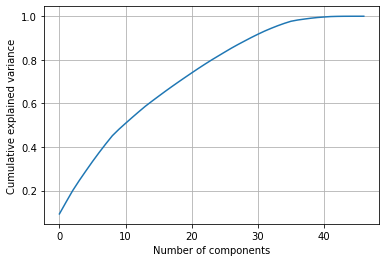

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


%matplotlib inline
pca = PCA().fit(m)
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [40]:
m.shape

(264786, 47)

In [41]:
np.mean(m),np.std(m)

(1.6253776515485995e-17, 0.9999999999999998)

In [21]:
#def PCA_algorithm(X):
n_components=2
p = PCA(n_components)

X_pca = p.fit_transform(m)

columns = []
i=1
while i <= n_components:
    columns.append("PC"+str(i))
    i+=1

PCA_df = pd.DataFrame(data = X_pca, columns=columns)
    
target = pd.Series(Y, name="Chromosome_Id")
    
PCA_df = pd.concat([PCA_df, target], axis = 1)

#   return PCA_df, m
PCA_df["Chromosome_Id"] = LabelEncoder().fit_transform(PCA_df["Chromosome_Id"])
PCA_df

,PC1,PC2,Chromosome_Id
0,-1.600784,-0.225368,0
1,-1.668608,-0.682457,0
2,-1.210883,0.198656,0
3,2.243699,1.051335,0
4,-2.645211,4.414258,0
...,...,...,...
264781,-1.884723,-2.289424,22
264782,3.320496,1.896785,22
264783,-0.167496,-0.681383,22
264784,0.103789,1.346404,22


In [22]:
print('Explained variation per principal component: {}'.format(p.explained_variance_ratio_))

Explained variation per principal component: [0.09008221 0.05543354]


In [19]:
#Save results from pca
PCA_df.to_csv("Results/PCA/9_Components_02747363-f04a-4ba6-a079-fe4f87853788.csv",index=False)

In [23]:
# Calculate the variance explained by priciple components
print("Variance of each component:", p.explained_variance_ratio_)
print("\n Total Variance Explained:", 
      round(sum(list(p.explained_variance_ratio_))*100, 2))

Variance of each component: [0.09008221 0.05543354]

 Total Variance Explained: 14.55


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

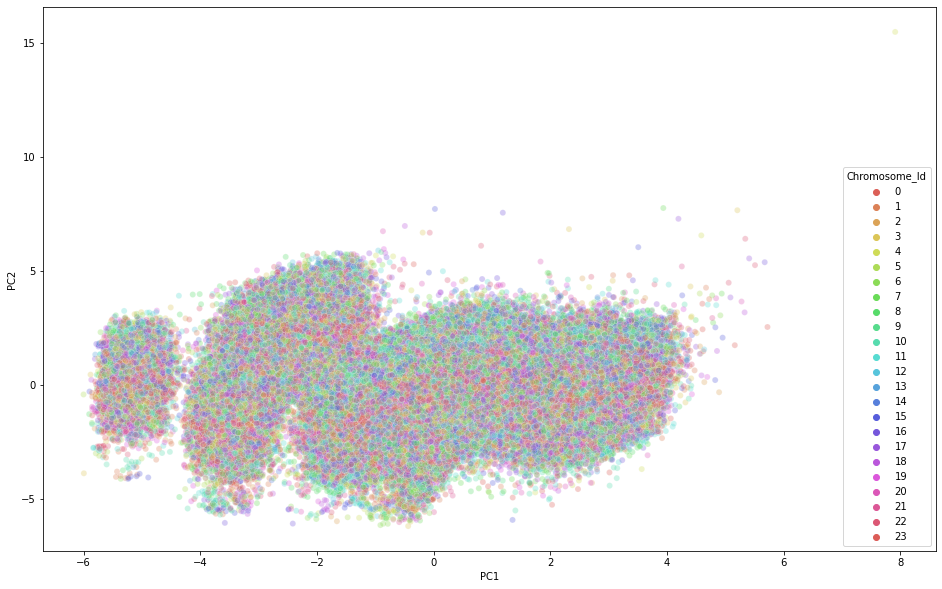

In [42]:
import seaborn as sns
plt.figure(figsize = (16,10))
sns.scatterplot(
    x = "PC1", y = "PC2",
    hue = "Chromosome_Id",
    palette = sns.color_palette("hls", 22,as_cmap=True),
    data = PCA_df,
    legend = "full",
    alpha = 0.3
)

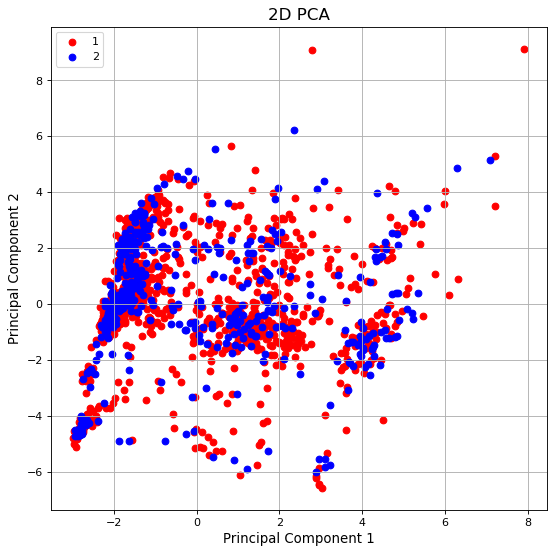

In [61]:
%matplotlib inline
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [0,1,2,3,4,5,6,7,8,9]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df["Chromosome_Id"] == clas, 'PC1'], 
                PCA_df.loc[PCA_df["Chromosome_Id"] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['1', '2'])
plt.grid()

# LDA - Linear Driscriminant Analysis

In [23]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [24]:
len(X.index)

264786

In [25]:
model = LinearDiscriminantAnalysis()
model.fit(X,Y)

LinearDiscriminantAnalysis()

In [26]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

0.18416884378044188
